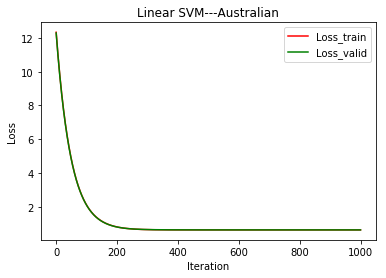

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split


def get_data(file):
    data = load_svmlight_file(file)
    return data[0], data[1]

def compute_loss(X, W, y, C = 1):
    L2 =  0.5 * np.dot(W.T, W)
    prediction_y = np.dot(X, W)
    #print("prediction_y", prediction_y)
    diff = np.ones(y.shape[0]) - y * prediction_y
    diff[diff < 0] = 0
    #print("diff", diff)
    hingeloss = C *(np.sum(diff)) / X.shape[0]
    loss = hingeloss + L2
    return loss

def get_gradient(X, W, y, C = 1):
    prediction_y = np.dot(X, W)
    diff = np.ones(y.shape[0]) - y * prediction_y
    #print("diff", diff.shape)
    #print("y", y.shape)
    y_copy = y.copy()
    y_copy[diff <= 0] = 0
    gradient = W - C * np.dot(y_copy, X) / X.shape[0]
    #print("Gradient", gradient)
    return gradient

X, y = get_data("D:/Task/MachineLearning/Test/LR/线性分类__australian/data/australian_scale")

X = X.toarray()
#add anothre column for x
column = np.ones((X.shape[0]))
X = np.column_stack((X,column))
X_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.30, random_state = 42)

#print("X_train", X_train.shape)
#print("y_train", y_train.shape)

W = np.random.normal(size=X_train.shape[1])

#set the learning rate and iterate number
leraning_rate = 0.01
iterate_number = 1000

loss_train = []
loss_valid = []

for i in range(iterate_number):
    gradient = get_gradient(X_train, W, y_train)
    #print(gradient)
    W = W - leraning_rate * gradient
    loss_train.append(compute_loss(X_train, W, y_train))
    loss_valid.append(compute_loss(x_valid, W, y_valid))
   
#ploting the loss value
plt.plot(loss_train, color="r", label="Loss_train")
plt.plot(loss_valid, color="g",label="Loss_valid")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Linear SVM---Australian")
plt.legend()
plt.show()


